In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.io as sio
import h5py

from rfdata import RFdata


In [2]:
mat_path= "./data/0728_mpsf2z2bpfmri_f5t128pminh4.8.mat"
param_path = "./data/0807tdrpos.mat"

In [3]:
#dat_out = sio.loadmat(mat_path)
D = h5py.File(mat_path)
D.keys()

[u'bpelfront',
 u'bpels',
 u'deltawave',
 u'drx',
 u'filename',
 u'hpmaxp',
 u'hpmaxs',
 u'medium_density',
 u'medium_sound_speed',
 u'moviename',
 u'moviesave',
 u'num_sensor_points',
 u'oriwave',
 u'pmaxp',
 u'pmaxs',
 u'pmins',
 u'rcvs',
 u'sensor_radius',
 u'sensorall',
 u'source_wn',
 u'stepnum',
 u'steps',
 u'txnum']

In [4]:
mat = D['rcvs'][()].transpose((2,0,1))
mat.shape

(4001, 128, 256)

In [5]:
#P = h5py.File(param_path)
P = sio.loadmat(param_path)
P.keys()

['oriwave',
 'regsf5',
 '__function_workspace__',
 'input_args',
 'source_delay',
 'None',
 'source_beforestartwn',
 'Nx',
 'Ny',
 'ans',
 'ringplace',
 'row',
 'tx',
 'bpelfront',
 'source_wn',
 'stepnum',
 'source',
 'num_sensor_points',
 'dt2',
 'dt1',
 '__version__',
 'sensor',
 'spr',
 'opens',
 'moviesave',
 'medium',
 'bpels',
 'nums',
 'regs',
 'tdrpos',
 'source_mag',
 'dx',
 'dy',
 'z1',
 'z2',
 't_end',
 'sensorall',
 'regsf5def',
 'source_freq',
 'source_txtime',
 '__header__',
 'z3',
 '__globals__',
 'txnum',
 'steps',
 'sensor_radius',
 'z',
 'moviename',
 'col']

In [7]:
pos = P['ringplace'].T # transducer geometry
pos.shape
dt = P['dt1'][0][0] # sampling interval
dt
vmap = P['regs'] # distribution of sound velocity
c = np.mean(vmap)
c

1498.3363819122314

In [8]:
rf = RFdata(
    pos = pos,
    mat = mat,
    src = np.arange(0, 256, 2),
    rcv = np.arange(0, 256, 1),
    dt = dt,
    c = c
)

In [9]:
rf.data.shape

(4001, 128, 256)

In [10]:
pos.shape

(256, 2)

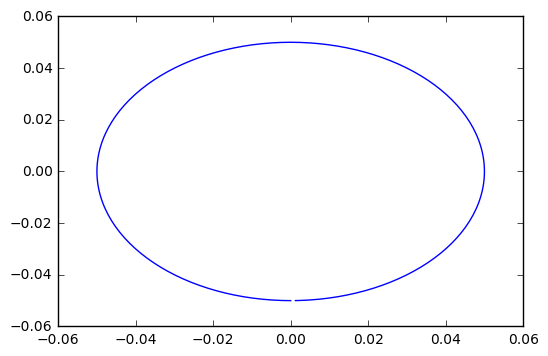

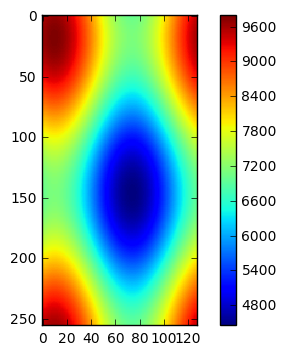

In [39]:
dist = rf.relevant_submat(np.array([5,10]))
plt.plot(pos[:,0],pos[:,1])
plt.show()
plt.imshow(dist, interpolation='nearest')
plt.colorbar()

In [40]:
rf.data.shape

(4001, 128, 256)

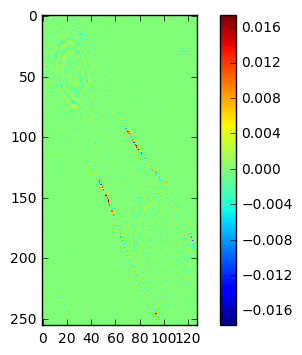

In [42]:
out = [
        [rf.data[min(dist[i, j], 4000), j, i] for j in range(dist.shape[1]) ] 
    for i in range(dist.shape[0]) 
]
img_out = np.array(out)
plt.imshow(img_out, interpolation='nearest')
plt.colorbar()

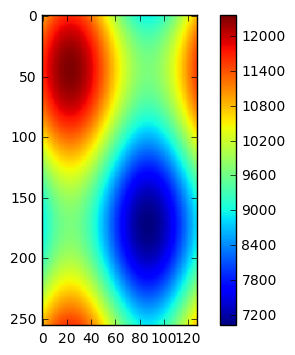

In [43]:
dist = rf.relevant_submat(np.array([32,16]))
plt.imshow(dist, interpolation='nearest')
plt.colorbar()

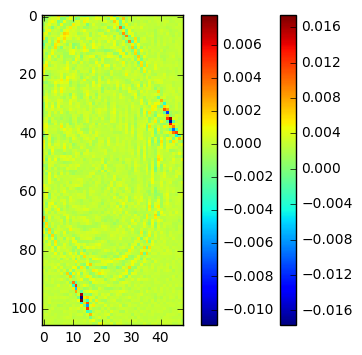

In [46]:
out = [
        [rf.data[min(dist[i, j], 4000), j, i] for j in range(dist.shape[1]) ] 
    for i in range(dist.shape[0]) 
]
img_out = np.array(out)
plt.imshow(img_out, interpolation='nearest')
plt.colorbar()
plt.imshow(img_out[150:, 80:], interpolation='nearest')
plt.colorbar()